### Ahmed Elsayed Ahmed 
### ahmadseneed@gmail.com


# **Titanic Dataset Analysis**

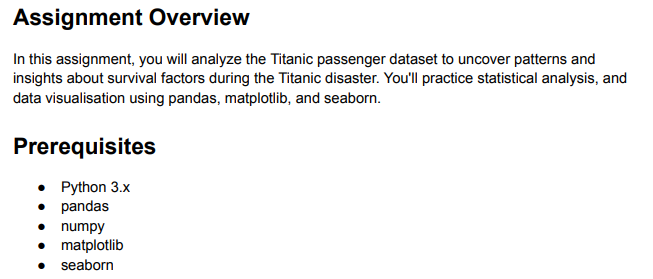

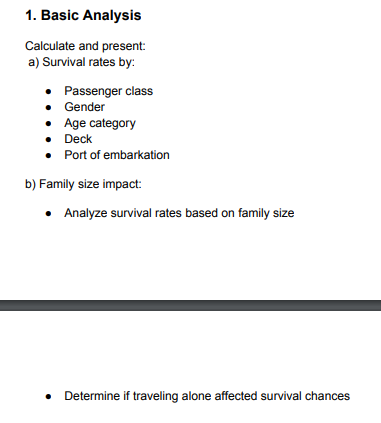

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr

In [3]:
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(data_url)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
# 1. Basic Analysis
## a) Survival rates
# Survival rates by Passenger Class
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print("Survival rates by Passenger Class:")
print(survival_by_class)


Survival rates by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [9]:
# Survival rates by Gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print("\nSurvival rates by Gender:")
print(survival_by_gender)


Survival rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [10]:
# Survival rates by Age Category
def age_category(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['AgeCategory'] = data['Age'].apply(lambda x: age_category(x) if pd.notnull(x) else 'Unknown')
survival_by_age_category = data.groupby('AgeCategory')['Survived'].mean()
print("\nSurvival rates by Age Category:")
print(survival_by_age_category)


Survival rates by Age Category:
AgeCategory
Adult     0.364362
Child     0.539823
Senior    0.269231
Name: Survived, dtype: float64


In [11]:
# Survival rates by Deck
def extract_deck(cabin):
    if pd.notnull(cabin):
        return cabin[0]
    else:
        return 'Unknown'

data['Deck'] = data['Cabin'].apply(extract_deck)
survival_by_deck = data.groupby('Deck')['Survived'].mean()
print("\nSurvival rates by Deck:")
print(survival_by_deck)


Survival rates by Deck:
Deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
T          0.000000
Unknown    0.299854
Name: Survived, dtype: float64


In [12]:
# Survival rates by Port of Embarkation
survival_by_port = data.groupby('Embarked')['Survived'].mean()
print("\nSurvival rates by Port of Embarkation:")
print(survival_by_port)


Survival rates by Port of Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [14]:
## b) Family size impact
# Define Family Size
data['FamilySize'] = data['SibSp'] + data['Parch']

# Survival rates based on Family Size
survival_by_family_size = data.groupby('FamilySize')['Survived'].mean()
print("\nSurvival rates by Family Size:")
print(survival_by_family_size)

# Impact of traveling alone
data['IsAlone'] = (data['FamilySize'] == 0)
survival_by_alone = data.groupby('IsAlone')['Survived'].mean()
print("\nImpact of traveling alone on Survival:")
print(survival_by_alone)


Survival rates by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Impact of traveling alone on Survival:
IsAlone
False    0.505650
True     0.303538
Name: Survived, dtype: float64


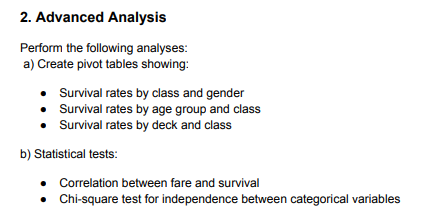

In [15]:
# 2. Advanced Analysis
## a) Pivot tables
# Survival rates by class and gender
pivot_class_gender = pd.pivot_table(data, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("\nPivot table - Survival rates by Class and Gender:")
print(pivot_class_gender)


Pivot table - Survival rates by Class and Gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [16]:
# Survival rates by age group and class
pivot_age_class = pd.pivot_table(data, values='Survived', index='AgeCategory', columns='Pclass', aggfunc='mean')
print("\nPivot table - Survival rates by Age Group and Class:")
print(pivot_age_class)


Pivot table - Survival rates by Age Group and Class:
Pclass              1         2         3
AgeCategory                              
Adult        0.641711  0.414013  0.218137
Child        0.916667  0.913043  0.371795
Senior       0.294118  0.250000  0.200000


In [17]:
# Survival rates by deck and class
pivot_deck_class = pd.pivot_table(data, values='Survived', index='Deck', columns='Pclass', aggfunc='mean')
print("\nPivot table - Survival rates by Deck and Class:")
print(pivot_deck_class)


Pivot table - Survival rates by Deck and Class:
Pclass          1         2         3
Deck                                 
A        0.466667       NaN       NaN
B        0.744681       NaN       NaN
C        0.593220       NaN       NaN
D        0.758621  0.750000       NaN
E        0.720000  0.750000  1.000000
F             NaN  0.875000  0.200000
G             NaN       NaN  0.500000
T        0.000000       NaN       NaN
Unknown  0.475000  0.440476  0.235908


In [18]:
## b) Statistical tests
# Correlation between fare and survival
fare_survival_corr, _ = pearsonr(data['Fare'].fillna(0), data['Survived'])
print("\nCorrelation between Fare and Survival:", fare_survival_corr)


Correlation between Fare and Survival: 0.25730652238496243


In [19]:
# Chi-square test for independence between categorical variables (Sex and Survival)
contingency_table = pd.crosstab(data['Sex'], data['Survived'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("\nChi-square test between Gender and Survival:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")



Chi-square test between Gender and Survival:
Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58, Degrees of Freedom: 1


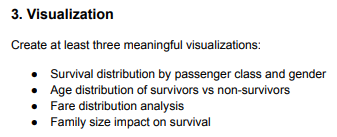

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


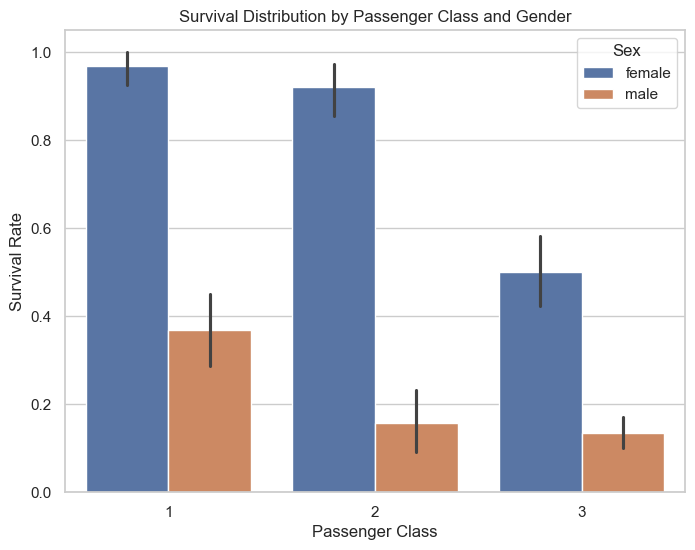

In [21]:
# 3. Visualization
sns.set(style="whitegrid")

# Survival distribution by passenger class and gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Distribution by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


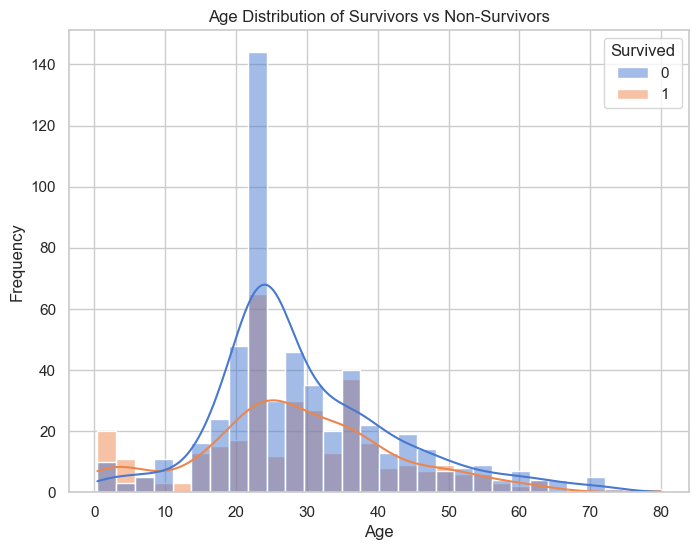

In [22]:
# Age distribution of survivors vs non-survivors
plt.figure(figsize=(8, 6))
sns.histplot(data, x='Age', hue='Survived', kde=True, bins=30, palette='muted')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


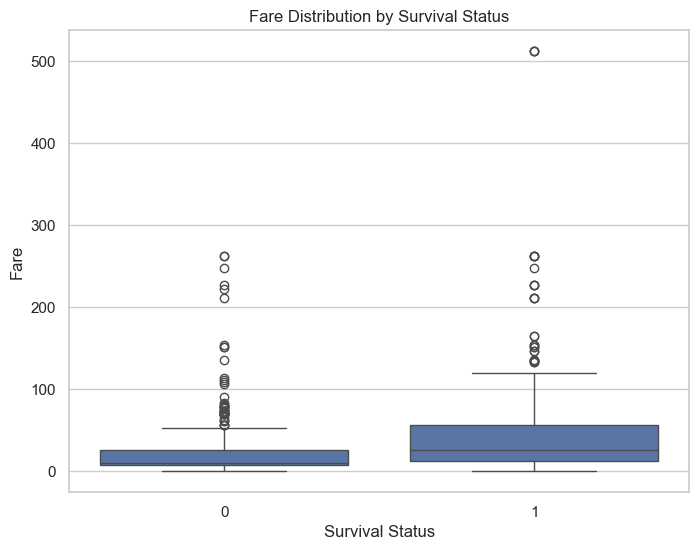

In [23]:
# Fare distribution analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.show()


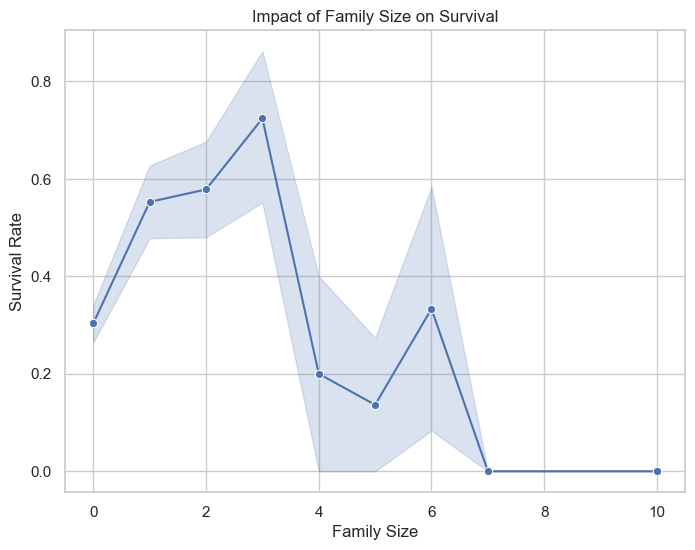

In [24]:
# Family size impact on survival
plt.figure(figsize=(8, 6))
sns.lineplot(x='FamilySize', y='Survived', data=data, marker='o')
plt.title('Impact of Family Size on Survival')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()



**Summary**

The analysis of the Titanic dataset reveals several key factors that influenced passenger survival during the disaster. Key findings include:

Passenger Class: First-class passengers had significantly higher survival rates compared to second and third-class passengers.

Gender: Women had a notably higher survival rate compared to men across all classes.

Age: Children had higher survival rates, while seniors faced the lowest survival chances.

Deck: Passengers from identifiable decks showed higher survival rates than those with unknown cabin assignments.

Port of Embarkation: Passengers boarding from specific ports exhibited slight differences in survival probabilities.

Family Size: Traveling alone significantly reduced survival chances, whereas small family sizes positively influenced survival rates.

---------------------------

**key insights**

Survival Rates:

First-class survival: 62.96% | Third-class survival: 24.24%.

Female survival: 74.20% | Male survival: 18.89%.

Family Size:

Survival rates peaked for small family sizes (1-2) and declined for larger families or solo travelers.

Statistical Analysis:

A positive correlation exists between fare and survival (Pearson correlation: 0.25).

Gender showed a statistically significant association with survival (Chi-square p-value: <0.001).

--------------------------------------

**Methodology**

Data Preparation:

Loaded the dataset from Kaggle’s direct CSV link.

Cleaned data by handling missing values for key variables (Age, Embarked, Cabin).

Basic Analysis:

Aggregated survival rates by categorical variables (Pclass, Sex, AgeCategory, Deck, Embarked).

Derived new columns: FamilySize and IsAlone.

Advanced Analysis:

Constructed pivot tables for multi-variable survival trends.

Conducted statistical tests: correlation and Chi-square tests.

Visualization:

Utilized Seaborn and Matplotlib to create meaningful plots.

## Visualizations

Survival Distribution by Class and Gender:

Visualized higher survival rates for women and first-class passengers.



Age Distribution of Survivors vs Non-Survivors:

Highlighted survival advantages for children.



Fare Distribution by Survival Status:

Indicated that higher fares correlated with increased survival probabilities.

---------------------------------

**Conclusion**

The survival chances during the Titanic disaster were heavily influenced by socio-economic status, gender, age, and family connections. Wealthier passengers and women prioritized evacuation, highlighting disparities in survival opportunities. Statistical tests confirmed significant associations between survival and key factors like fare and gender.

_____________________________________________________________